<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>A2: MODELING CASE STUDY (INDIVIDUAL)</h2>
<h4> | Introduction to ML & AI</h4>
MBAN - Hult International Business School<br>
April 5, 2024 <br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

<h3>Analysis Introduction</h3><br>
As a Public health consultant, we are diving into a very important analysis 
focus on understanding how the different metrics present on the dataset given 
would affect to birthweight. 

The main goal with this it is to understand how health are 
the babies based on their birthweight. This code will engineer a new metric to 
predict. This binary classifier will operationalize the condition where a baby's 
birthweight falls below 2500 grams—a threshold recognized by medical professionals 
for indicating low birthweight—as 1, encapsulating this critical health indicator 
within a tangible, actionable framework - Creating a binary indicator for low birth 
weight 'low_bwght' = 'bwght' < 2500.

This script also will run a Machine Learning Model to help us to come up 
with good insights. 


<h3>Analysis Questions</h3><br>
Here below there are the questions assigned to answer during the analysis 

   - **Strong positive correlations with bwght:** The higher the variable, the greater the bwght.
     - npvis: 0.18
     - fage: 0.14
     As indicated by the numbers above, higher hospital visits (npvis) and older fathers (fage) are associated with higher birthweights.

   - **Strong negative correlations with bwght:** The higher the variable, the lower the bwght.
     - foth: -0.07
     As indicated by the numbers above, if the father is of an ethnicity other than black or white, the child will weigh less.

There is an official threshold that indicates when birthweight becomes more dangerous. Studies indicate that "If your baby weighs less than 2500 grams, he or she has a low birth weight." Research also suggests that low birth weight might cause several issues such as low oxygen levels at birth, trouble staying warm, and infection.

The two features that have the strongest impact on the ML model are:

   - **feduc_npvis_interaction**: This feature indicates how the father's education level relates to the number of visits. Higher education levels of fathers and more frequent prenatal visits positively affect birthweight. Better education may lead to better job opportunities and higher income, enabling better access to healthcare. Conversely, individuals with lower education levels may face barriers to accessing healthcare, so having access to healthcare would ensure that kids are in general health 
   
   - **meduc_npvis_interaction**:This feature indicates how the mother´s education level relates to the number of visits. This feature that also correlated good with birthweight could be understand as same as the one above. Better education, means being better prepared for the future in terms of job so might not be any problems to go into the healthcare system.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [161]:
##############################################################################
############################ Importing Packages ##############################         
##############################################################################

# importing libraries
import numpy             as np  # mathematical essentials
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn           as sns # enhanced data viz
import phik                     # phi coefficient
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# loading data

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


##############################################################################
######################### Importing & Reading Datasets #######################         
##############################################################################

# loading data
file = './datasets/birthweight.csv'

data = pd.read_csv(file)

data.head(n=10)


,bwt_id,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,bwt_1,28,12.0,2,10.0,31.0,17.0,8.0,9.0,0.0,0.0,0,1,0,0,1,0,0,3317
1,bwt_2,21,NaN,1,6.0,21.0,NaN,8.0,9.0,NaN,NaN,0,1,0,0,1,0,0,1160
2,bwt_3,27,15.0,2,11.0,32.0,16.0,9.0,9.0,0.0,0.0,1,1,0,0,1,0,0,4706
3,bwt_4,33,17.0,1,20.0,39.0,17.0,9.0,10.0,0.0,0.0,0,0,0,1,0,0,1,3289
4,bwt_5,30,15.0,2,12.0,36.0,16.0,9.0,9.0,NaN,NaN,1,1,0,0,1,0,0,3490
5,bwt_6,29,16.0,1,12.0,32.0,16.0,8.0,9.0,0.0,0.0,0,1,0,0,1,0,0,3345
6,bwt_7,31,12.0,2,12.0,31.0,12.0,9.0,9.0,0.0,0.0,0,1,0,0,1,0,0,3030
7,bwt_8,28,12.0,1,13.0,31.0,14.0,8.0,9.0,0.0,0.0,0,1,0,0,1,0,0,3771
8,bwt_9,24,12.0,2,15.0,25.0,12.0,8.0,9.0,0.0,0.0,1,1,0,0,1,0,0,1660
9,bwt_10,28,16.0,1,12.0,32.0,12.0,8.0,9.0,0.0,0.0,0,1,0,0,1,0,0,1786


In [162]:
## Preparing Data Kaggle
file_2 = './datasets/kaggle_test_data.csv'

df_test = pd.read_csv(file_2)

data['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

df_full = pd.concat(objs = [data, df_test],
                    axis = 0,
                    ignore_index = False)


## Preparing X_kaggle_test
#X_kaggle_test = data_kaggle.drop(['bwt_id'], axis=1, errors='ignore')


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Exploratory Data Analysis and Data Processing</h3>

<p>
Data analysis is essential for handling missing values in datasets. Understanding 
the structure and characteristics of our data allows us to make informed decisions on 
how to handle missing values, such as imputing them with appropriate statistics like the median or mean. 
These steps are crucial for preparing our data to be used in predictive modeling tasks.

Null values in all columns have been imputed with the median values. 
This choice is made because our data distribution generally contains outliers. 
Using the mean ensures that our imputed values are robust to the presence of outliers.
Bwght feature is not going to be imputed as it is the column used for predictions. 
    
- We have dropped columns 'omaps','fmaps' as they are not relevant for our analysis.
- Regarding Null Values, we have 5 nulls that need to be imputed. 

Also, regarding distribution: 
  
    - mage: Appears to be normally distributed, centered around the 20s and 30s.
    - meduc: Bimodal distribution, with peaks at the completion of middle school and high school.
    - monpre: Right-skewed distribution, indicating that low values are common and high values are rare.
    - npvis: Very right-skewed.
    - fage: Appears to be normally distributed.
    - feduc: Highly irregular distribution.
    - Cigs and Drinks variables indicate that many individuals from the survey do not smoke or drink.
    
</p>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


In [163]:
df_full.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,473.000000,467.000000,473.000000,452.000000,472.000000,463.000000,471.000000,471.000000,440.000000,441.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,409.000000
mean,29.784355,13.680942,2.205074,11.535398,32.169492,13.866091,8.225053,8.951168,1.172727,0.020408,0.505285,0.871036,0.073996,0.054968,0.877378,0.073996,0.048626,3189.870416
std,5.105664,2.136672,1.330149,3.924575,6.097656,2.222327,1.368447,0.575893,4.211621,0.297017,0.500501,0.335515,0.262041,0.228160,0.328350,0.262041,0.215312,748.450059
min,16.000000,3.000000,0.000000,0.000000,18.000000,6.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000
25%,26.000000,12.000000,1.000000,10.000000,28.000000,12.000000,8.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2780.000000
50%,30.000000,13.000000,2.000000,12.000000,32.000000,14.000000,9.000000,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3340.000000
75%,33.000000,16.000000,3.000000,13.000000,36.000000,16.000000,9.000000,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3686.000000
max,44.000000,17.000000,8.000000,36.000000,62.000000,17.000000,10.000000,10.000000,30.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5089.000000


In [164]:
df_full.isnull().sum(axis = 0)

bwt_id     0
mage       0
meduc      6
monpre     0
npvis     21
fage       1
feduc     10
omaps      2
fmaps      2
cigs      33
drink     32
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght     64
set        0
dtype: int64

In [165]:
##############################################################################
##########################      NUll values   ################################
##############################################################################

##Using the mean in all our metrics to impute our null values.


# Calculate the mean on meduc
mean_meduc = df_full['meduc'].mean()
# Fill null values with the median visibility
df_full['meduc'].fillna(value=mean_meduc, inplace=True)

# Calculate the mean on npvis 
mean_npvis = df_full['npvis'].mean()
# Fill null values with the median visibility
df_full['npvis'].fillna(value=mean_npvis, inplace=True)

# Calculate mean on fage 
mean_fage = df_full['fage'].mean()
# Fill null values with the median visibility
df_full['fage'].fillna(value=mean_fage, inplace=True)

#Calcualte mean feduc 
mean_feduc =df_full['feduc'].mean()
# Fill null values with the median visibility
df_full['feduc'].fillna(value=mean_feduc, inplace=True)

#
mean_cigs = df_full['cigs'].mean()
# Fill null values with the median visibility
df_full['cigs'].fillna(value=mean_cigs, inplace=True)

mean_drink =df_full['drink'].mean()
df_full['drink'].fillna(value=mean_drink, inplace=True)

df_full.isnull().sum(axis = 0) 


bwt_id     0
mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
omaps      2
fmaps      2
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght     64
set        0
dtype: int64

In [166]:
## Droping 'omaps','fmaps' which does not make sense for our analysis

df_full=df_full.drop(['omaps','fmaps'], axis=1)

In [167]:
## Null no anymore
df_full.isnull().sum(axis = 0)

bwt_id     0
mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght     64
set        0
dtype: int64

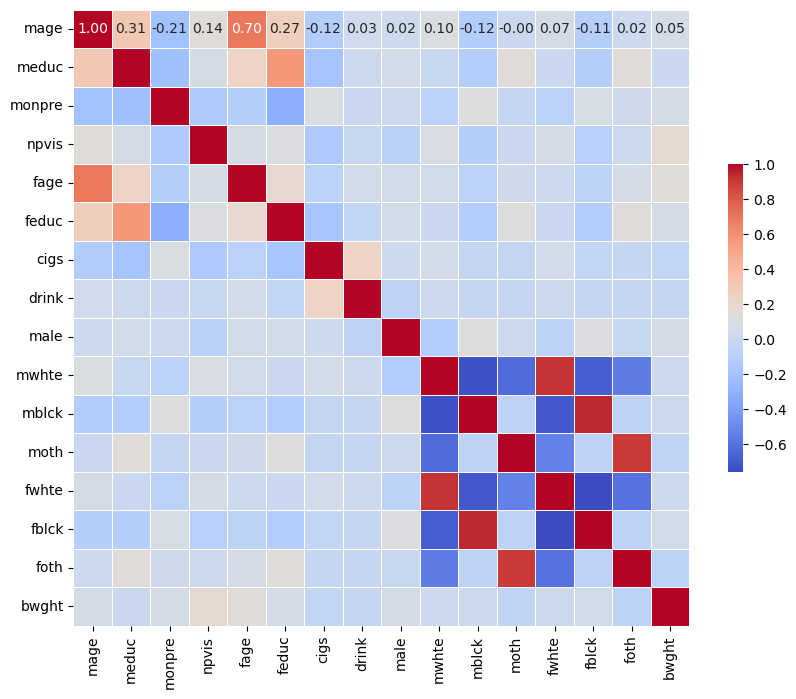

In [168]:
##############################################################################
#########################  Correlation HeatMap   #############################          
##############################################################################

#Creating a df to drop non - numerical values
df_special = df_full.drop(['bwt_id','set'], axis=1)

#Compute the correlation matrix

corr_matrix = df_special.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot 
plt.show()

In [169]:
##############################################################################
#########################  Correlation Matrix   ##############################          
##############################################################################

# Below we can see that clearly there are two metrics that correlate better 
# with bwght, so we basically are going to focus on this on the feature 
# engineering 

df_corr = df_full.drop(columns=['bwt_id', 'set'
                               ]).corr(method = 'pearson').round(2)

df_corr.loc[ : , ['bwght'] ].sort_values(by = 'bwght',
                                                                ascending = False)

,bwght
bwght,1.00
npvis,0.18
fage,0.14
monpre,0.06
feduc,0.06
male,0.06
mage,0.05
fblck,0.04
mwhte,0.02
mblck,0.02


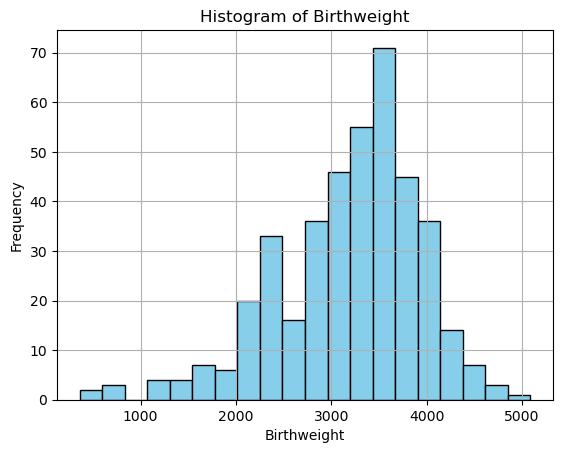

In [170]:
##############################################################################
###########################     Histograms     ###############################         
##############################################################################

# Histograms that will help us to understand how Birthweight is distributed so 
# We can understand better what we need to predict. 

# We can clearly see that the highest percentaje are address to those kids 
# who weight more than 2500.


plt.hist(data['bwght'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Birthweight')
plt.ylabel('Frequency')
plt.title('Histogram of Birthweight')
plt.grid(True)
plt.show()


/Users/carmencastillomartin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carmencastillomartin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carmencastillomartin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carmencastillomartin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

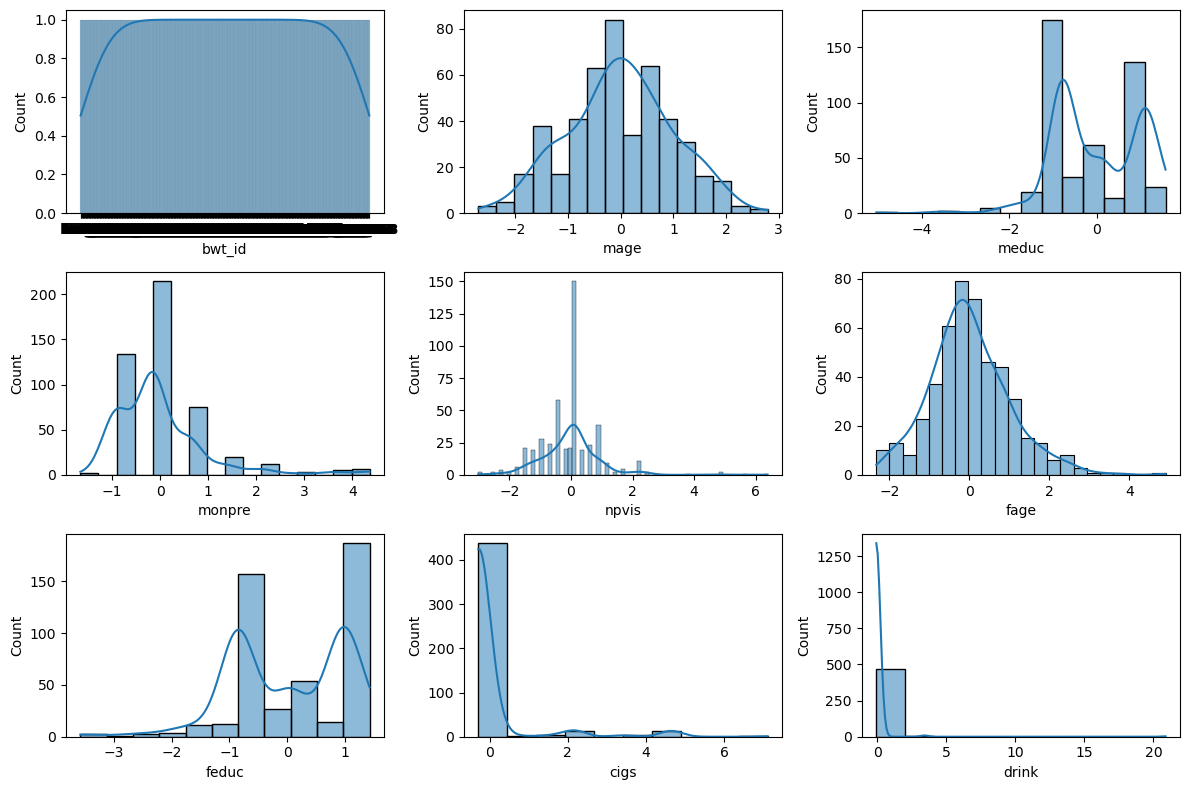

In [186]:
##############################################################################
########################   Exploring variables     ###########################         
##############################################################################
# With these graphs below we can see how each variable is distributed: 

fig, ax = plt.subplots(figsize = (12, 8))
ax.remove()

# initializing a counter
count = 0


# looping to create visualizations
for col in df_full:

    # condition to break
    if count == 9:
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    plt.subplot(3, 3, count)
    sns.histplot(x = df_full[col],
                kde = True)


# formatting, saving, and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Feature Engineering</h3>

<p>

</p>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [171]:
##############################################################################
################       Defining our response variable       ##################       
##############################################################################

y_variable = 'low_bwght'

In [172]:
#############################################################################
############################## Feature 01 ###################################
#############################################################################

## It is highly recommended that the prenatal care starts before the 3rd month
# Assuming 'df' is your DataFrame containing the 'monpre' column

# Create a new column 'month_care_risk' based on values in 'monpre'
df_full['month_care_risk'] = df_full['monpre'].apply(lambda x: 1 if x > 3 else 0)


In [173]:
##############################################################################
##############################  Feature 02  ##################################
##############################################################################

## Studying if Ethinity of the family is address to birthweight.
# This 

df_full['Family Ethnicity'] = 'Mix'

# Iterate through each row
for index, row in data.iterrows():
    # Check if both mother and father are white
    if row['mwhte'] == 1 and row['fwhte'] == 1:
        df_full.at[index, 'Family Ethnicity'] = 'White'
    # Check if both mother and father are black
    elif row['mblck'] == 1 and row['fblck'] == 1:
        df_full.at[index, 'Family Ethnicity'] = 'Black'

##############################################################################
##############################  Feature 03  ##################################
##############################################################################



df_full['mother_risk_due_to_age'] = 0

# Establecer el valor en 1 para las madres mayores de 35 años
df_full.loc[df_full['mage'] >= 35, 'mother_risk_due_to_age'] = 1


##############################################################################
##############################  Feature 04  ##################################
##############################################################################

# Other way to classify mothers age the younger, the less dangerous so they 
# might have an healhier baby


df_full['mage_Q'] = pd.qcut(df_full['mage'], q=4, labels=False)


##############################################################################
##############################  Feature 05  ##################################
##############################################################################

# Exploring how ethinicity could affect the kid weight. 
# This code will assign 1 - if the whole family (mother and father are from 
# The same ethinity, otherwise it will assign 0)


df_full['ethnicity_number'] = '0'

# Iterate through each row
for index, row in data.iterrows():
    # Check if both mother and father are white
    if row['mwhte'] == 1 and row['fwhte'] == 1:
        df_full.at[index, 'ethnicity_number'] = 1  # Assign 1 to white families
    # Check if both mother and father are black
    elif row['mblck'] == 1 and row['fblck'] == 1:
        df_full.at[index, 'ethnicity_number'] = 1  # Assign 0 to black families


##############################################################################
##############################  Feature 06  ##################################
##############################################################################

# This feature tries to identify how dangerous could be having a baby on late 
# ages based on the mage_Q quartiles classification - 

df_full['mage_Q_2'] = 0

# Apply conditions to set values of 'otra_col_2'
df_full.loc[(df_full['male'] == 1) & (df_full['mage_Q'].between(2, 4)), 'mage_Q_2'] = 1



In [174]:
##############################################################################
##############################  Feature 07  ##################################
##############################################################################

# 1. Sum of mage and fage (mother and father age). With this we can see the 
# total age of the couple

df_full['parental_age_interaction'] = df_full['mage'] * df_full['fage']

# 2. Creating quartiles to classify age so it will be easier identify age 
# range


quartiles = df_full['parental_age_interaction'].quantile([0.25, 0.5, 0.75])

# Function to categorize each record based on quartiles
def categorize_interaction(row):
    if row <= quartiles.iloc[0]:
        return 0  # Q1
    elif row <= quartiles.iloc[1]:
        return 1  # Q2
    elif row <= quartiles.iloc[2]:
        return 2  # Q3
    else:
        return 3  # Q4

# Apply the function to create the new column
df_full['parental_age_interaction_number'] = df_full['parental_age_interaction'].apply(categorize_interaction)


In [175]:
##############################################################################
##############################  Feature 08  ##################################
##############################################################################

# How the mother age affects the weight

df_full['mage_cigs_interaction'] = df_full['mage'] * df_full['cigs']

##############################################################################
##############################  Feature 09  ##################################
##############################################################################

# How the mother age who smokes affects the weight 

df_full['mage_drink_interaction'] = df_full['mage'] * df_full['drink']

##############################################################################
##############################  Feature 10  ##################################
##############################################################################

# How mother´s education is correlated to visits to the hospital

df_full['meduc_npvis_interaction'] = df_full['meduc'] * df_full['npvis']

##############################################################################
##############################  Feature 11  ##################################
##############################################################################

# How father´s education is correlated to visits to the hospital

df_full['feduc_npvis_interaction'] = df_full['feduc'] * df_full['npvis']


In [176]:
#Checking that there is not any null values anymore after feature engineering 

df_full.isnull().sum(axis = 0)

bwt_id                              0
mage                                0
meduc                               0
monpre                              0
npvis                               0
fage                                0
feduc                               0
cigs                                0
drink                               0
male                                0
mwhte                               0
mblck                               0
moth                                0
fwhte                               0
fblck                               0
foth                                0
bwght                              64
set                                 0
month_care_risk                     0
Family Ethnicity                    0
mother_risk_due_to_age              0
mage_Q                              0
ethnicity_number                    0
mage_Q_2                            0
parental_age_interaction            0
parental_age_interaction_number     0
mage_cigs_in

In [177]:
## Checking correlations and dropping strings cols 

df_corr = df_full.drop(columns=['bwt_id','Family Ethnicity','set'
                               ]).corr(method = 'pearson').round(2)
 
df_corr.loc[ : , ['bwght'] ].sort_values(by = 'bwght',
                                                                ascending = False)

,bwght
bwght,1.00
feduc_npvis_interaction,0.18
npvis,0.18
meduc_npvis_interaction,0.15
fage,0.14
parental_age_interaction,0.10
parental_age_interaction_number,0.08
monpre,0.06
feduc,0.06
male,0.06


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Standarization</h3>

<p>

</p>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [178]:
from sklearn.preprocessing import StandardScaler

#This is going to help us to have all our features on the same measures so 
#our analysis will make sense

# List of continuous features to standardize - Adding numericals features including new features and transformations
continuous_features = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 
                       'fblck', 'foth', 'bwght', 'month_care_risk', 'mother_risk_due_to_age', 'mage_Q', 'ethnicity_number', 
                       'parental_age_interaction', 'parental_age_interaction_number' 
                       ]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the continuous features and transform them
df_full[continuous_features] = scaler.fit_transform(df_full[continuous_features])



In [157]:
#Separating the kaggle data 
## Parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_full[df_full['set'] == 'Kaggle'].copy()


# dataset for model building
df = df_full[df_full['set'] == 'Not Kaggle' ].copy()



# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)


# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Definition of variables</h3>

<p>
On this part on the script, x_features and low_bwght are defined, to later go 
    through the model.
</p>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [179]:
##############################################################################
###########################  Defining x features   ###########################
##############################################################################

## Excluding those variables which are correlated below 0 or negative from the 
# model, so we will get better results as well as non numerical, otherwise 
# our model would not run 

x_features= ['npvis', 'fage', 'monpre','feduc',
            'male','mage','ethnicity_number','fblck',
            'mage_Q','fwhte','mblck','mwhte','mother_risk_due_to_age','parental_age_interaction',
            'feduc_npvis_interaction','meduc_npvis_interaction', 'parental_age_interaction', 'parental_age_interaction_number',
            'month_care_risk']

In [180]:
## Converting birthweight into a binary classification metric (low birthweight as 1, otherwise 0)
df['low_bwght'] = (df['bwght'] < 2500).astype(int)

df_full['low_bwght'] = (df['bwght'] < 2500).astype(int)

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

y_data = df[y_variable]


# removing non-numeric columns and missing values
x_data = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features = list(x_data.columns)



# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702)
                                                     

# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df.shape[0]}
Features  (Columns): {df.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")



Original Dataset Dimensions
---------------------------
Observations (Rows): 409
Features  (Columns): 30


Training Data (X-side)
----------------------
Observations (Rows): 306
Features  (Columns): 19


Training Data (y-side)
----------------------
Feature Name:        low_bwght
Observations (Rows): 306


Testing Data (X-side)
---------------------
Observations (Rows): 103
Features  (Columns): 19


Testing Data (y-side)
---------------------
Feature Name:        low_bwght
Observations (Rows): 103


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Model</h3>

<p>
    <h4>Random Forest Classifier</h4>
      Random Forest Classifier has been selected from all the models, as it is the one that gave 
      better results on Kaggle which means that provided better predicitions.
    
</p>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [109]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

#Random Forest Classifier 
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 702)

# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)

# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)

# SCORING the results
print('Training ACCURACY:', round(rf_default_fit.score(x_train, y_train), ndigits = 4))
print('Testing  ACCURACY:', round(rf_default_fit.score(x_test , y_test ), ndigits = 4))

from sklearn.metrics import confusion_matrix


# Unpacking the confusion matrix
rf_tn= confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()
rf_fp= confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()
rf_fn= confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")  



Training ACCURACY: 1.0
Testing  ACCURACY: 1.0

True Negatives : [103]
False Positives: [103]
False Negatives: [103]
True Positives : [103]



In [110]:
# x-data
x_data_kaggle = kaggle_data[x_features].copy()

# Predicting using the fitted model
kaggle_predictions = rf_default.predict(x_data_kaggle)

# Organizing predictions
model_predictions = {"low_bwght" : kaggle_predictions}

# Converting predictions into DataFrame
model_pred_df = pd.DataFrame(data=model_predictions, index=kaggle_data.bwt_id)

In [111]:
# Saving the submission file locally
submission_file_path = 'kaggle_submission.csv'
model_pred_df.to_csv(submission_file_path, index=True)

print(f"Submission file saved to: {submission_file_path}")

Submission file saved to: kaggle_submission.csv


In [112]:
## Kaggle Submission File ##

# organizing predictions
model_predictions = {"low_bwght" : kaggle_predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = kaggle_data.bwt_id)